In [308]:
#setup
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from ipywidgets import interact

In [309]:
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [310]:
#read csv
df = pd.read_csv('Melbourne_housing_FULL.csv')
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [311]:
df.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

In [312]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29217 entries, 0 to 29216
Data columns (total 21 columns):
Suburb           29217 non-null object
Address          29217 non-null object
Rooms            29217 non-null int64
Type             29217 non-null object
Price            22850 non-null float64
Method           29217 non-null object
SellerG          29217 non-null object
Date             29217 non-null object
Distance         29217 non-null float64
Postcode         29217 non-null int64
Bedroom2         22665 non-null float64
Bathroom         22659 non-null float64
Car              22357 non-null float64
Landsize         19649 non-null float64
BuildingArea     11817 non-null float64
YearBuilt        13473 non-null float64
CouncilArea      29215 non-null object
Lattitude        22878 non-null float64
Longtitude       22878 non-null float64
Regionname       29215 non-null object
Propertycount    29215 non-null float64
dtypes: float64(11), int64(2), object(8)
memory usage: 4.7+ MB


In [313]:
df.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,29217.000000,2.285000e+04,29217.000000,29217.000000,22665.000000,22659.000000,22357.000000,19649.000000,11817.000000,13473.000000,22878.000000,22878.000000,29215.000000
mean,3.013451,1.056543e+06,10.826519,3113.517952,3.029605,1.601174,1.682784,581.161382,157.422735,1964.937876,-37.812002,145.001545,7535.831936
std,0.975952,6.466137e+05,6.501154,102.778677,0.996666,0.721436,0.995973,3591.192385,427.686929,37.421665,0.085665,0.114382,4421.509141
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,-38.185600,144.423790,83.000000
25%,2.000000,6.370000e+05,6.300000,3049.000000,2.000000,1.000000,1.000000,200.000000,99.000000,1940.000000,-37.861300,144.936700,4380.000000
50%,3.000000,8.800000e+05,10.100000,3103.000000,3.000000,1.000000,2.000000,486.000000,132.000000,1970.000000,-37.808800,145.006400,6567.000000
75%,4.000000,1.300000e+06,13.800000,3152.000000,4.000000,2.000000,2.000000,665.000000,184.000000,2000.000000,-37.757393,145.068630,10331.000000
max,16.000000,1.120000e+07,48.100000,3978.000000,30.000000,12.000000,26.000000,433014.000000,44515.000000,2106.000000,-37.395100,145.526350,21650.000000


In [314]:
#gerando variáveis com quantidade de colunas(features) numéricas e categóricas
categorical = len(df.describe(include=[np.object]).columns)
numeric = len(df.describe(exclude=[np.object]).columns)
#exibindo os valores
print("Variáveis categóricas: {}\nVariáveis numéricas: {}".format(categorical,numeric))

Variáveis categóricas: 8
Variáveis numéricas: 13


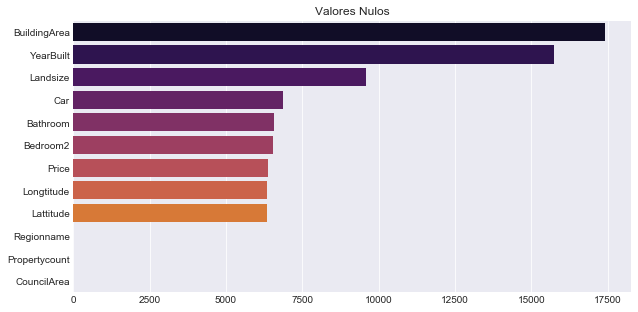

In [315]:
bar = df.isnull().sum().sort_values(ascending = False)
bar = bar[bar > 0]
plt.figure(figsize=(10,5))
sns.barplot(y=bar.index, x=bar, orient='h', palette='inferno')
plt.title('Valores Nulos');

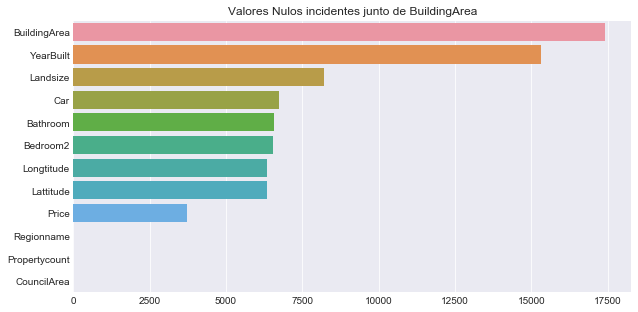

In [316]:
bar = df[df['BuildingArea'].isnull()].isnull().sum().sort_values(ascending = False)
bar = bar[bar > 0]
plt.figure(figsize=(10,5))
sns.barplot(y=bar.index, x=bar, orient='h')
plt.title('Valores Nulos incidentes junto de BuildingArea');

In [317]:
#Excluindo todas as linhas que não possuem Area de Construção
df = df[df['BuildingArea'].notnull()]
#Excluindo Latitude e Longetude pois além de possuirem vários valores nulos, a coluna região pode ser utilizada no lugar
df.drop(['Longtitude','Lattitude'], axis=1,inplace=True)

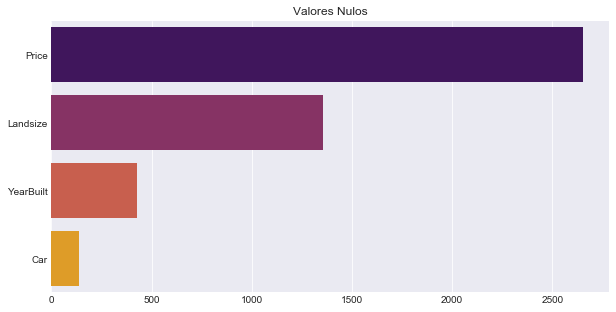

In [318]:
bar = df.isnull().sum().sort_values(ascending = False)
bar = bar[bar > 0]
plt.figure(figsize=(10,5))
sns.barplot(y=bar.index, x=bar, orient='h', palette='inferno')
plt.title('Valores Nulos');

In [319]:
#Preenchendo outros valores nulos com média e mediana
df['Landsize'].update(df['Landsize'].fillna(df['Landsize'].median()))
df['YearBuilt'].update(df['YearBuilt'].fillna(df['YearBuilt'].median()))
df['Car'].update(df['Car'].fillna(df['Car'].median()))

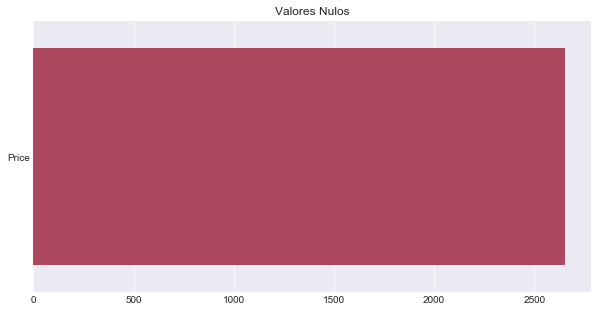

In [320]:
bar = df.isnull().sum().sort_values(ascending = False)
bar = bar[bar > 0]
plt.figure(figsize=(10,5))
sns.barplot(y=bar.index, x=bar, orient='h', palette='inferno')
plt.title('Valores Nulos');

In [321]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11817 entries, 2 to 29216
Data columns (total 19 columns):
Suburb           11817 non-null object
Address          11817 non-null object
Rooms            11817 non-null int64
Type             11817 non-null object
Price            9165 non-null float64
Method           11817 non-null object
SellerG          11817 non-null object
Date             11817 non-null object
Distance         11817 non-null float64
Postcode         11817 non-null int64
Bedroom2         11817 non-null float64
Bathroom         11817 non-null float64
Car              11817 non-null float64
Landsize         11817 non-null float64
BuildingArea     11817 non-null float64
YearBuilt        11817 non-null float64
CouncilArea      11817 non-null object
Regionname       11817 non-null object
Propertycount    11817 non-null float64
dtypes: float64(9), int64(2), object(8)
memory usage: 1.8+ MB


In [322]:
#Quantidade de casas sem valores de preço 
df['Price'].isnull().sum()

2652

In [323]:
#quantidade antiga de linhas e colunas
df.shape

(11817, 19)

In [324]:
#separando base de conhecimento de dados a serem predicados
train = df[df['Price'].notnull()]
test = df[df['Price'].isnull()]

In [325]:
#validando linhas
train.shape[0] + test.shape[0]

11817

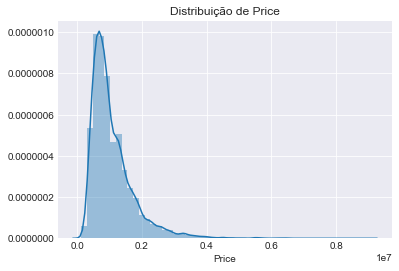

In [326]:
sns.distplot(train['Price'])
plt.title('Distribuição de Price');

Text(0.5,1,'Distribuição de Price na base log10.')

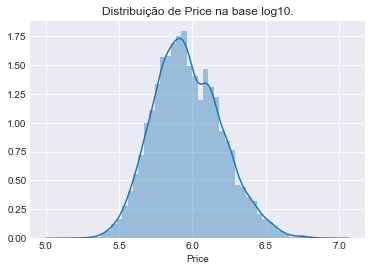

In [327]:
sns.distplot(np.log10(train['Price']))
plt.title('Distribuição de Price na base log10.')

In [328]:
train['Price'] = train['Price'].apply(lambda x:np.log10(x))

In [329]:
#Printando categorias de cada variável categórica do DataFrame
for col in df.describe(include=[np.object]).columns:
    print('Quantidade de Categorias em {}: {}'.format(col,len(df[col].value_counts())))

Quantidade de Categorias em Suburb: 319
Quantidade de Categorias em Address: 11620
Quantidade de Categorias em Type: 3
Quantidade de Categorias em Method: 9
Quantidade de Categorias em SellerG: 277
Quantidade de Categorias em Date: 67
Quantidade de Categorias em CouncilArea: 33
Quantidade de Categorias em Regionname: 8


In [330]:
train['Regionname'] = train['Regionname'].map({'Northern Metropolitan':'N Metro',
                                            'Western Metropolitan':'W Metro', 
                                            'Southern Metropolitan':'S Metro', 
                                            'Eastern Metropolitan':'E Metro', 
                                            'South-Eastern Metropolitan':'SE Metro', 
                                            'Northern Victoria':'N Vic',
                                            'Eastern Victoria':'E Vic',
                                            'Western Victoria':'W Vic'})

In [331]:
def age_type(age):
    if age < 1950:
        return 'Old'
    else:
        return 'New'
    
train['HouseAge'] = train['YearBuilt'].apply(age_type)

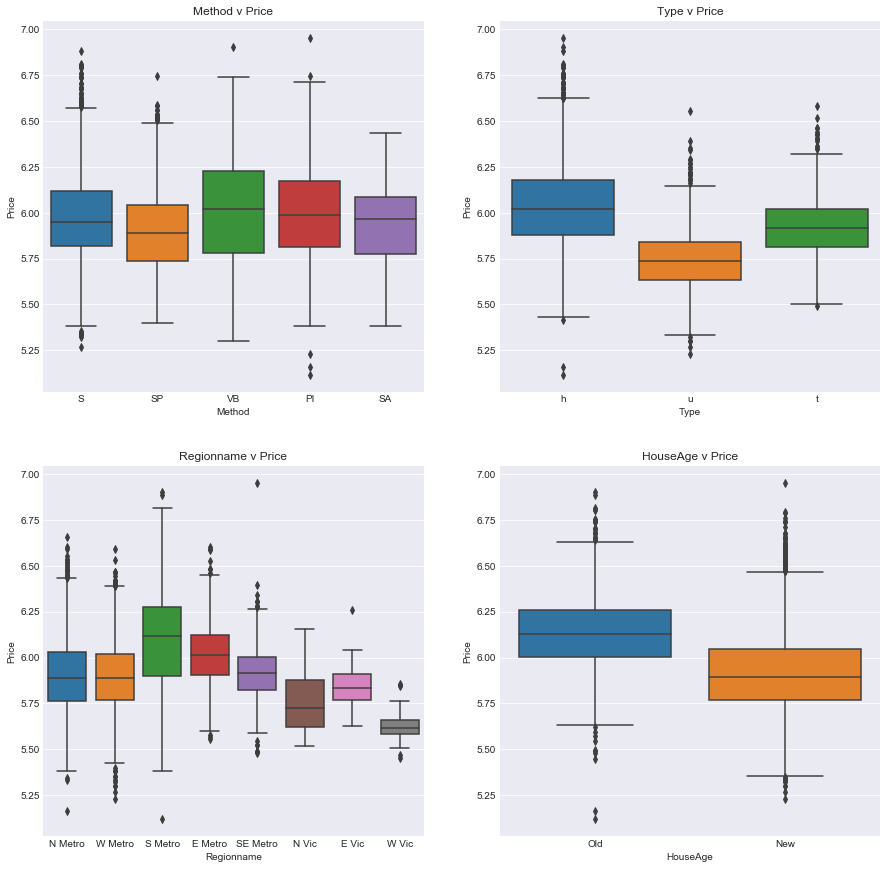

In [332]:
sns.set_style('darkgrid')
f, axes = plt.subplots(2,2, figsize = (15,15))  

sns.boxplot(x='Method', y='Price', data=train, ax=axes[0,0])
axes[0,0].set_xlabel('Method')
axes[0,0].set_ylabel('Price')
axes[0,0].set_title('Method v Price')

sns.boxplot(x='Type', y='Price', data=train, ax=axes[0,1])
axes[0,1].set_xlabel('Type')
axes[0,1].set_ylabel('Price')
axes[0,1].set_title('Type v Price')

sns.boxplot(x='Regionname', y='Price', data=train, ax=axes[1,0])
axes[1,0].set_xlabel('Regionname')
axes[1,0].set_ylabel('Price')
axes[1,0].set_title('Regionname v Price')

sns.boxplot(x='HouseAge', y='Price', data=train, ax=axes[1,1])
axes[1,1].set_xlabel('HouseAge')
axes[1,1].set_ylabel('Price')
axes[1,1].set_title('HouseAge v Price');

    

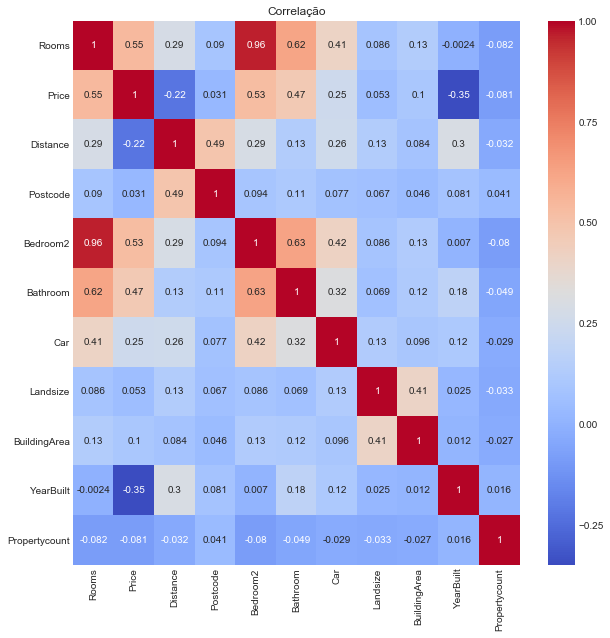

In [333]:
plt.figure(figsize=(10,10))
sns.heatmap(train.corr(), annot=True, cmap='coolwarm')
plt.title('Correlação');

In [334]:
cols = ['Rooms','Bathroom','Bedroom2','BuildingArea']

def plot_scatter(coluna):
    plt.figure(figsize=(10,6))
    _ = plt.scatter(x=coluna, y='Price', data=train, edgecolors='black', c='r',)
    _.axes.set_xlabel(coluna)
    _.axes.set_ylabel('Price')
    plt.title('{} v Price'.format(coluna))

interact(plot_scatter, coluna=cols);

A Jupyter Widget

In [335]:
#removendo outliers
train = train[train['BuildingArea'] < 2000]

In [336]:
from sklearn.model_selection import cross_val_score, train_test_split, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, ElasticNetCV, Lasso
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler

In [337]:
numeric_features = train[['Bedroom2','Car','Rooms','Bathroom','BuildingArea']]
categoric_features = train[['HouseAge','Regionname','Type','Method']]
y = train['Price']

In [338]:
categoric_features.shape

(9161, 4)

In [339]:
categoric_features = pd.get_dummies(categoric_features)

In [340]:
categoric_features.shape

(9161, 18)

In [341]:
numeric_features.head(5)

,Bedroom2,Car,Rooms,Bathroom,BuildingArea
2,2.0,0.0,2,1.0,79.0
4,3.0,0.0,3,2.0,150.0
6,3.0,2.0,4,1.0,142.0
11,4.0,0.0,3,2.0,210.0
14,2.0,2.0,2,1.0,107.0


In [342]:
numeric_features['BuildingArea'] = numeric_features['BuildingArea'].apply(lambda x: np.log10(x))
numeric_features['BuildingArea'] = numeric_features['BuildingArea'].apply(lambda x: round(x,1))
numeric_features[numeric_features['BuildingArea'] < 0] = numeric_features['BuildingArea'].median()
#numeric_features['BuildingArea'].value_counts()

In [343]:
numeric_features.head(5)

,Bedroom2,Car,Rooms,Bathroom,BuildingArea
2,2.0,0.0,2.0,1.0,1.9
4,3.0,0.0,3.0,2.0,2.2
6,3.0,2.0,4.0,1.0,2.2
11,4.0,0.0,3.0,2.0,2.3
14,2.0,2.0,2.0,1.0,2.0


In [344]:
X = pd.concat([numeric_features,categoric_features], axis=1)
X.shape

(9161, 23)

In [345]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = .30, random_state= 0)

In [346]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((6412, 23), (2749, 23), (6412,), (2749,))

In [347]:
n_folds = 5
from sklearn.metrics import make_scorer
from sklearn.model_selection import KFold
scorer = make_scorer(mean_squared_error,greater_is_better = False)
def rmse_CV_train(model):
    kf = KFold(n_folds,shuffle=True,random_state=41).get_n_splits(X.values)
    rmse = np.sqrt(-cross_val_score(model,X_train,y_train,scoring ="neg_mean_squared_error",cv=kf))
    return (rmse)
def rmse_CV_test(model):
    kf = KFold(n_folds,shuffle=True,random_state=41).get_n_splits(X.values)
    rmse = np.sqrt(-cross_val_score(model,X_test,y_test,scoring ="neg_mean_squared_error",cv=kf))
    return (rmse)

In [348]:
lr = LinearRegression()
lr.fit(X_train,y_train)
test_pre = lr.predict(X_test)
train_pre = lr.predict(X_train)
print('rmse on train',rmse_CV_train(lr).mean())
print('rmse on test',rmse_CV_test(lr).mean())

rmse on train 0.13534694485
rmse on test 0.133184105148


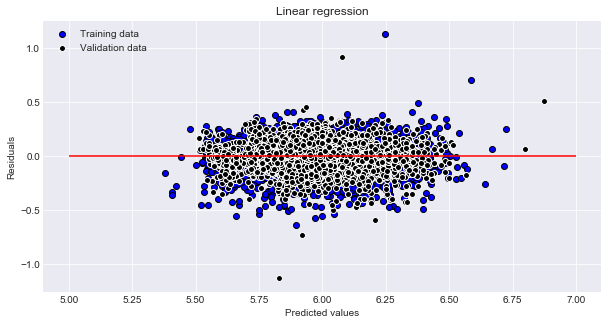

In [349]:
#plot between predicted values and residuals
plt.figure(figsize=(10,5))
plt.scatter(train_pre, train_pre - y_train, c = "blue",  label = "Training data",edgecolors='black')
plt.scatter(test_pre,test_pre - y_test, c = "black",  label = "Validation data", edgecolors='white')
plt.title("Linear regression")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc = "upper left")
plt.hlines(y = 0, xmin = 5, xmax = 7, color = "red")
plt.show()

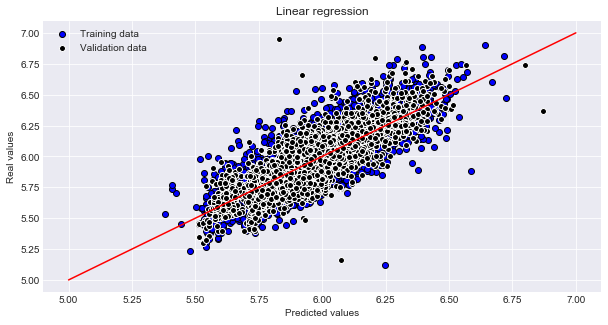

In [350]:
# Plot predictions - Real values
plt.figure(figsize=(10,5))
plt.scatter(train_pre, y_train, c = "blue",  label = "Training data",edgecolors='black')
plt.scatter(test_pre, y_test, c = "black",  label = "Validation data",edgecolors='white')
plt.title("Linear regression")
plt.xlabel("Predicted values")
plt.ylabel("Real values")
plt.legend(loc = "upper left")
plt.plot([5, 7], [5, 7], c = "red")
plt.show()